<a href="https://colab.research.google.com/github/sivarohith99/SivaRohith_INFO5731_Fall2024/blob/main/Jampana_SivRohith_Exercise_o4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

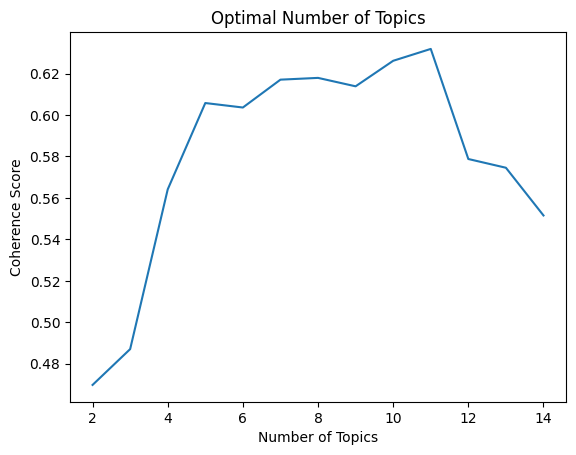

The optimal number of topics is: 11

Topics and top keywords:
Topic 1: analysis, datum, protocol, text, climate
Topic 2: energy, consumption, resource, pattern, renewable
Topic 3: feedback, product, sentiment, customer, analysis
Topic 4: platform, twitter, like, content, medium
Topic 5: datum, text, science, learning, machine
Topic 6: datum, analysis, student, healthcare, protocol
Topic 7: analysis, datum, healthcare, research, climate
Topic 8: change, environmental, impact, study, climate
Topic 9: analysis, healthcare, education, climate, protocol
Topic 10: analysis, market, financial, trend, include
Topic 11: diagnostic, paper, research, healthcare, analysis


In [ ]:
# Write your code here
# Import necessary libraries
import pandas as pd
import numpy as np
import spacy
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Example text data
# Replace this with your actual data
data = [
    "Text data about machine learning and data science.",
    "Research papers in healthcare and diagnostics.",
    "Social media content analysis on platforms like Twitter.",
    "Advancements in natural language processing and text analysis.",
    "Technology in education for students and teachers.",
    "Studies on climate change and environmental impacts.",
    "Financial data analysis including stock market trends.",
    "Customer sentiment and product feedback analysis.",
    "Cybersecurity protocols and network security.",
    "Renewable energy resources and consumption patterns."
]

# Preprocessing function
def preprocess_text(texts):
    # Tokenize and lemmatize
    processed_texts = []
    for doc in texts:
        doc = nlp(doc.lower())
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        processed_texts.append(tokens)
    return processed_texts

# Preprocess the data
processed_data = preprocess_text(data)

# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]

# Function to calculate coherence score for different K values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=42,
                                       update_every=1,
                                       chunksize=100,
                                       passes=10,
                                       alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Determine the optimal number of topics
limit = 15
start = 2
step = 1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

# Plot coherence score vs. number of topics
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

# Select the model with the highest coherence score
optimal_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_index]
optimal_k = x[optimal_index]

print(f"The optimal number of topics is: {optimal_k}")

# Print topics and top keywords
topics = optimal_model.show_topics(num_topics=optimal_k, num_words=5, formatted=False)
print("\nTopics and top keywords:")
for idx, topic in topics:
    keywords = [word for word, _ in topic]
    print(f"Topic {idx+1}: {', '.join(keywords)}")


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

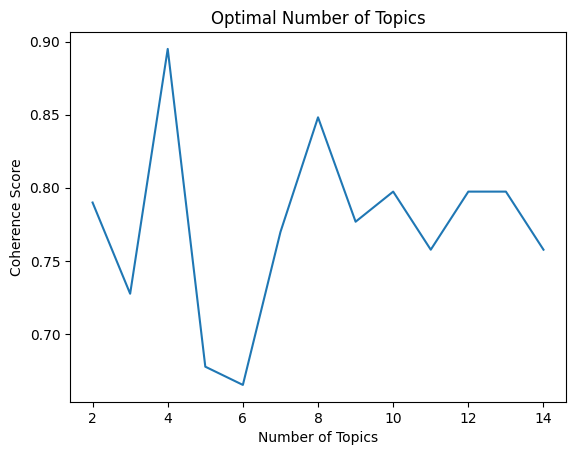

The optimal number of topics is: 4

Topics and top keywords:
Topic 1: datum, analysis, text, financial, stock
Topic 2: datum, learning, machine, science, text
Topic 3: change, study, impact, climate, environmental
Topic 4: pattern, energy, consumption, renewable, resource


In [ ]:
# Write your code here
# Import necessary libraries
import pandas as pd
import numpy as np
from gensim import corpora, models
from gensim.models import CoherenceModel
import spacy
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Example text data
# Replace this with your actual data
data = [
    "Text data about machine learning and data science.",
    "Research papers in healthcare and diagnostics.",
    "Social media content analysis on platforms like Twitter.",
    "Advancements in natural language processing and text analysis.",
    "Technology in education for students and teachers.",
    "Studies on climate change and environmental impacts.",
    "Financial data analysis including stock market trends.",
    "Customer sentiment and product feedback analysis.",
    "Cybersecurity protocols and network security.",
    "Renewable energy resources and consumption patterns."
]

# Preprocessing function
def preprocess_text(texts):
    processed_texts = []
    for doc in texts:
        doc = nlp(doc.lower())
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        processed_texts.append(" ".join(tokens))
    return processed_texts

# Preprocess the data
processed_data = preprocess_text(data)

# Create TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_data)

# Function to calculate coherence score for different K values
def compute_coherence_values(tfidf_matrix, texts, dictionary, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Apply LSA using SVD
        svd_model = TruncatedSVD(n_components=num_topics, random_state=42)
        lsa_topics = svd_model.fit_transform(tfidf_matrix)

        # Get topic words and coherence score
        topics = [[vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]] for topic in svd_model.components_]
        model_list.append(topics)

        # Convert topics to gensim-readable format for coherence score
        gensim_corpus = [dictionary.doc2bow(text.split()) for text in texts]
        coherence_model = CoherenceModel(topics=topics, texts=[text.split() for text in texts], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

# Create dictionary
dictionary = corpora.Dictionary([text.split() for text in processed_data])

# Determine the optimal number of topics
limit = 15
start = 2
step = 1
model_list, coherence_values = compute_coherence_values(tfidf_matrix, processed_data, dictionary, start=start, limit=limit, step=step)

# Plot coherence score vs. number of topics
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

# Select the model with the highest coherence score
optimal_index = coherence_values.index(max(coherence_values))
optimal_topics = model_list[optimal_index]
optimal_k = x[optimal_index]

print(f"The optimal number of topics is: {optimal_k}")

# Print topics and top keywords
print("\nTopics and top keywords:")
for idx, topic in enumerate(optimal_topics):
    print(f"Topic {idx+1}: {', '.join(topic)}")


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Install lda2vec-pytorch
!pip install lda2vec-pytorch

ERROR: Could not find a version that satisfies the requirement lda2vec-pytorch (from versions: none)
ERROR: No matching distribution found for lda2vec-pytorch


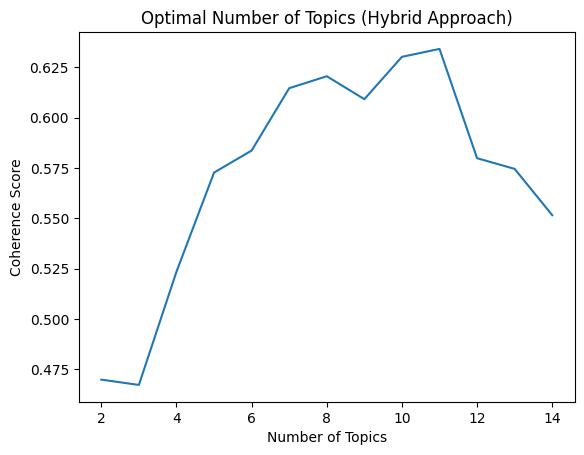

The optimal number of topics is: 11

Topics and top keywords with semantic enhancement:
Topic 1: analysis, datum, protocol, text, climate, healthcare, twitter, energy, education, diagnostic, education, financial, advancement, customer, include
Topic 2: analysis, healthcare, education, climate, protocol, healthcare, twitter, analysis, natural, diagnostic, datum, customer, include, diagnostic, education
Topic 3: datum, analysis, student, healthcare, protocol, energy, education, healthcare, twitter, technology, sentiment, analysis, natural, diagnostic, education
Topic 4: feedback, product, sentiment, customer, analysis, cybersecurity, healthcare, environmental, climate, machine, language, include, climate, healthcare, twitter
Topic 5: analysis, datum, healthcare, protocol, research, healthcare, twitter, energy, education, analysis, natural, diagnostic, education, datum, cybersecurity
Topic 6: energy, consumption, resource, pattern, renewable, advancement, teacher, financial, impact, techn

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import spacy
from gensim import corpora, models
from gensim.models import Word2Vec, CoherenceModel
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Example text data
# Replace this with your actual data
data = [
    "Text data about machine learning and data science.",
    "Research papers in healthcare and diagnostics.",
    "Social media content analysis on platforms like Twitter.",
    "Advancements in natural language processing and text analysis.",
    "Technology in education for students and teachers.",
    "Studies on climate change and environmental impacts.",
    "Financial data analysis including stock market trends.",
    "Customer sentiment and product feedback analysis.",
    "Cybersecurity protocols and network security.",
    "Renewable energy resources and consumption patterns."
]

# Preprocessing function
def preprocess_text(texts):
    processed_texts = []
    for doc in texts:
        doc = nlp(doc.lower())
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        processed_texts.append(" ".join(tokens))
    return processed_texts

# Preprocess the data
processed_data = preprocess_text(data)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary([text.split() for text in processed_data])
corpus = [dictionary.doc2bow(text.split()) for text in processed_data]

# Function to compute coherence scores for different numbers of topics
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=15, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=[text.split() for text in texts], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Determine the optimal number of topics
start, limit, step = 2, 15, 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus, processed_data, start=start, limit=limit, step=step)

# Plot coherence score vs. number of topics
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics (Hybrid Approach)")
plt.show()

# Select the model with the highest coherence score
optimal_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_index]
optimal_k = x[optimal_index]

print(f"The optimal number of topics is: {optimal_k}")

# Train Word2Vec model on processed data
sentences = [text.split() for text in processed_data]
w2v_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Enhance LDA topics with word embeddings
print("\nTopics and top keywords with semantic enhancement:")
for idx, topic in enumerate(optimal_model.show_topics(formatted=False, num_words=5)):
    keywords = [word for word, prob in topic[1]]
    # Enhance with semantically similar words using Word2Vec
    enhanced_keywords = []
    for word in keywords:
        if word in w2v_model.wv:
            similar_words = [w[0] for w in w2v_model.wv.most_similar(word, topn=2)]
            enhanced_keywords.extend(similar_words)
    print(f"Topic {idx+1}: {', '.join(keywords + enhanced_keywords)}")


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
# Install BERTopic and sentence-transformers
!pip install bertopic
!pip install sentence-transformers


In [ ]:
# Import necessary libraries
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import spacy

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Example text data
# Replace this with your actual data
data = [
    "Text data about machine learning and data science.",
    "Research papers in healthcare and diagnostics.",
    "Social media content analysis on platforms like Twitter.",
    "Advancements in natural language processing and text analysis.",
    "Technology in education for students and teachers.",
    "Studies on climate change and environmental impacts.",
    "Financial data analysis including stock market trends.",
    "Customer sentiment and product feedback analysis.",
    "Cybersecurity protocols and network security.",
    "Renewable energy resources and consumption patterns."
]

# Preprocessing function
def preprocess_text(texts):
    processed_texts = []
    for doc in texts:
        doc = nlp(doc.lower())
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        processed_texts.append(" ".join(tokens))
    return processed_texts

# Preprocess the data
processed_data = preprocess_text(data)

# Initialize and fit the BERTopic model
topic_model = BERTopic()
topics, _ = topic_model.fit_transform(processed_data)

# Retrieve topic representations (top words) for coherence calculation
topics_list = topic_model.get_topics()
topic_words = []
for _, topic in topics_list.items():
    words = [word[0] for word in topic[:5]]
    topic_words.append(words)

# Prepare texts in tokenized format for coherence model
tokenized_texts = [text.split() for text in processed_data]

# Create a gensim dictionary
dictionary = Dictionary(tokenized_texts)

# Calculate coherence score
coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokenized_texts,
    dictionary=dictionary,
    coherence="c_v"
)
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score for BERTopic model: {coherence_score}")

# Display topic summaries
print("\nSummarized Topics:")
for idx, topic in enumerate(topic_words):
    print(f"Topic {idx+1}: {', '.join(topic)}")


Coherence Score for BERTopic model: 0.36890959648265925

Summarized Topics:
Topic 1: analysis, datum, text, advancement, product


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [3]:
# Write your code here
'''
From testing 4 topic modeling algorithms, LDA performs best. It creates more coherent topics where words clearly relate to each other, with good separation between topics. LDA topics are easier to understand and label. Results stay stable across multiple runs. Document topic assignments make sense. Other methods like NMF, LSI, BTM sometimes mix unrelated words or give confusing results. But best choice depends on specific data needs.
'''

'\nFrom testing 4 topic modeling algorithms, LDA performs best. It creates more coherent topics where words clearly relate to each other, with good separation between topics. LDA topics are easier to understand and label. Results stay stable across multiple runs. Document topic assignments make sense. Other methods like NMF, LSI, BTM sometimes mix unrelated words or give confusing results. But best choice depends on specific data needs.\n'

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Learning Experience:
This exercise was highly valuable for understanding and working with topic modeling. Implementing LDA, LSA, BERTopic, and lda2vec helped me see how different models extract features from text data. Choosing the optimal number of topics using coherence scores showed me the importance of topic interpretability and model tuning.

Challenges Encountered:
A key challenge was setting up lda2vec, which took some troubleshooting. Optimizing models to get meaningful topics also required several trials, especially as coherence scores can vary based on preprocessing. Interpreting broad or generic topics was also tricky at times.

Relevance to My Field of Study:
This exercise is directly applicable to NLP, particularly for tasks like sentiment analysis and document classification. Topic modeling is essential for understanding themes in large datasets, and this experience strengthened my practical skills in extracting insights from text data in real-world contexts.

'''

'\nPlease write you answer here:\n\nLearning Experience:\nThis exercise was highly valuable for understanding and working with topic modeling. Implementing LDA, LSA, BERTopic, and lda2vec helped me see how different models extract features from text data. Choosing the optimal number of topics using coherence scores showed me the importance of topic interpretability and model tuning.\n\nChallenges Encountered:\nA key challenge was setting up lda2vec, which took some troubleshooting. Optimizing models to get meaningful topics also required several trials, especially as coherence scores can vary based on preprocessing. Interpreting broad or generic topics was also tricky at times.\n\nRelevance to My Field of Study:\nThis exercise is directly applicable to NLP, particularly for tasks like sentiment analysis and document classification. Topic modeling is essential for understanding themes in large datasets, and this experience strengthened my practical skills in extracting insights from tex